In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


In [96]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [97]:
raw_labels = pd.read_csv("data/dog/labels.csv")

labels_only = raw_labels['breed']

labels_set = set(labels_only)


num_labels = len(labels_set)

map_breed = {}

i=0;
for breed in labels_set:
    map_breed[breed] = i
    i+=1
    

label_map={}
for i in range(len(raw_labels['id'])):
    label_map[raw_labels['id'][i]] = map_breed[raw_labels['breed'][i]]
    
    
# Y_train = to_categorical(Y_train, num_classes = 10)















  0%|          | 0/10222 [00:00<?, ?it/s]

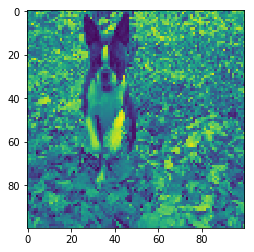

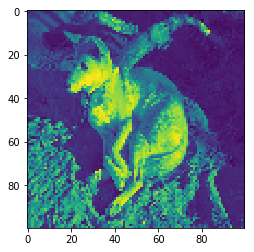















  0%|          | 2/10222 [00:00<16:05, 10.58it/s]

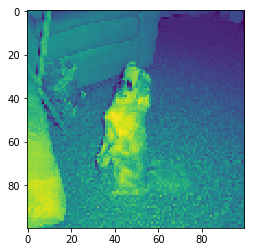

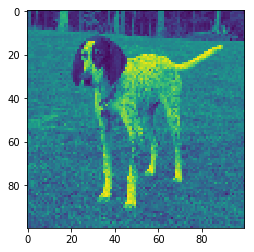















  0%|          | 4/10222 [00:00<15:47, 10.78it/s]

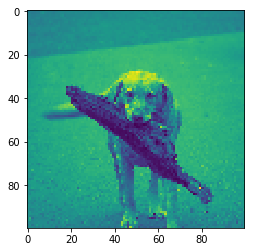

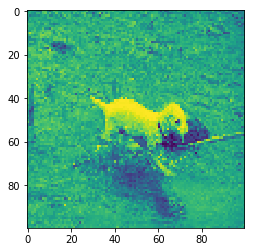















  0%|          | 6/10222 [00:00<15:33, 10.95it/s]

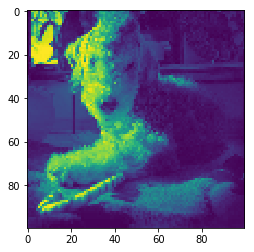

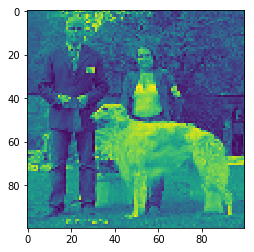















  0%|          | 8/10222 [00:00<15:23, 11.06it/s]

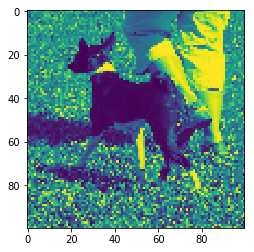

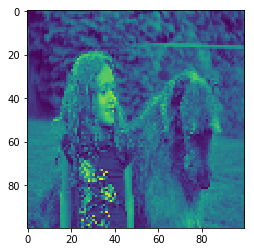















  0%|          | 10/10222 [00:00<15:18, 11.12it/s]

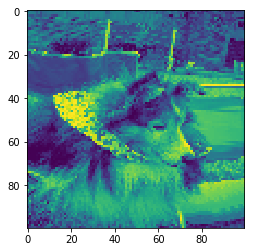

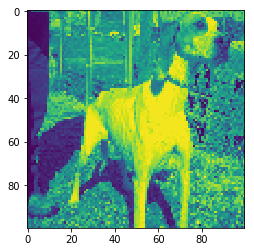















  0%|          | 12/10222 [00:01<15:19, 11.11it/s]

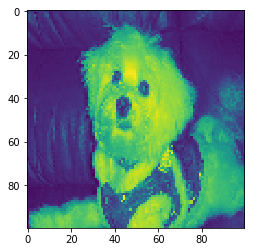

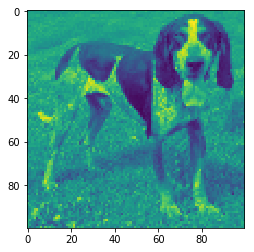















  0%|          | 14/10222 [00:01<15:17, 11.13it/s]

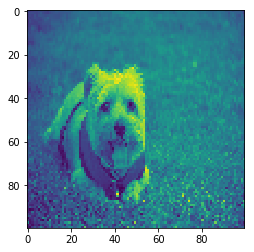

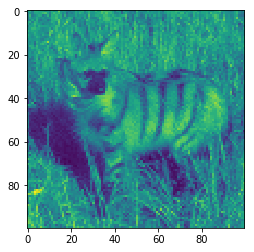















  0%|          | 16/10222 [00:01<15:15, 11.15it/s]

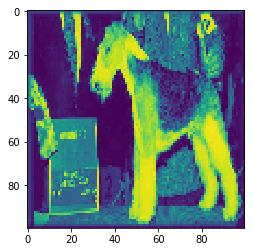

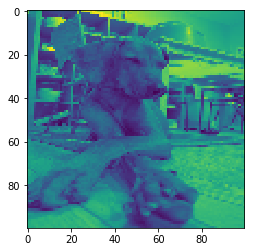















  0%|          | 18/10222 [00:01<15:11, 11.19it/s]

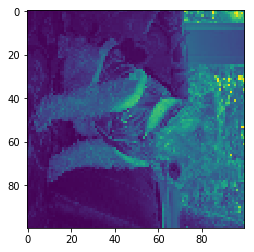

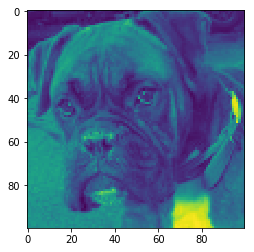















  0%|          | 20/10222 [00:01<15:05, 11.26it/s]

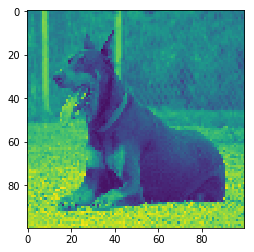

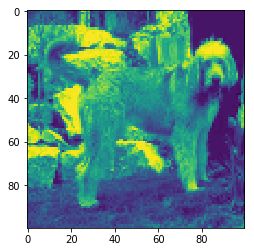















  0%|          | 22/10222 [00:01<15:06, 11.26it/s]

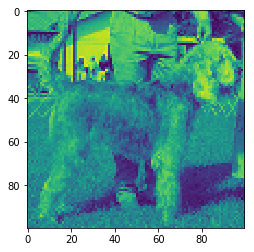

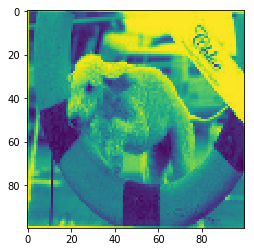















  0%|          | 24/10222 [00:02<15:12, 11.18it/s]

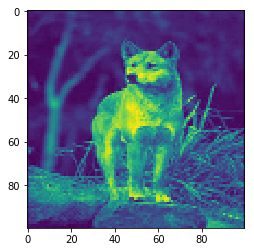

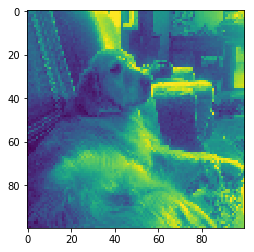















  0%|          | 26/10222 [00:02<15:17, 11.12it/s]

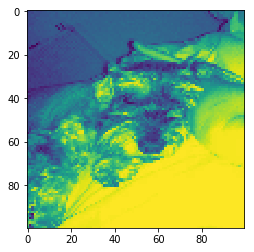

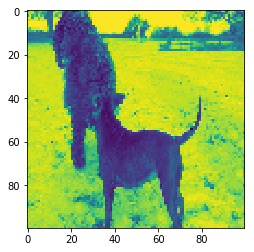















  0%|          | 28/10222 [00:02<15:16, 11.12it/s]

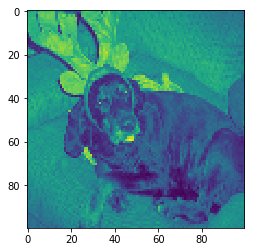

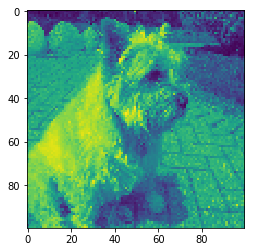















  0%|          | 30/10222 [00:02<15:25, 11.01it/s]

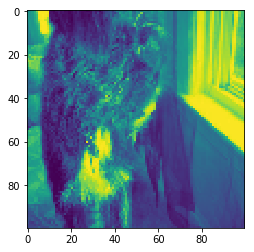

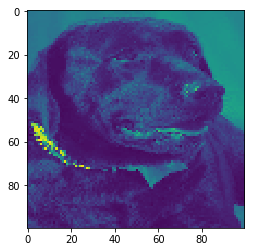















  0%|          | 32/10222 [00:02<15:30, 10.95it/s]

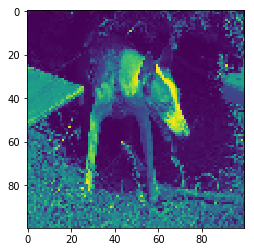

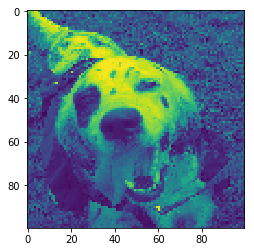















  0%|          | 34/10222 [00:03<16:33, 10.26it/s]

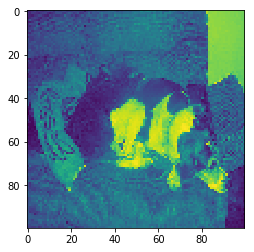















  0%|          | 35/10222 [00:03<16:34, 10.24it/s]

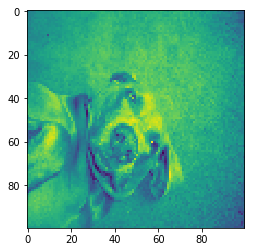















  0%|          | 36/10222 [00:03<16:35, 10.23it/s]

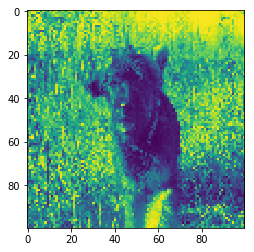















  0%|          | 37/10222 [00:03<16:37, 10.21it/s]

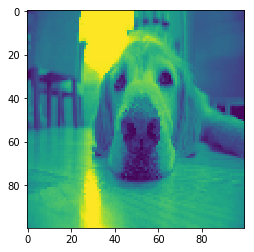

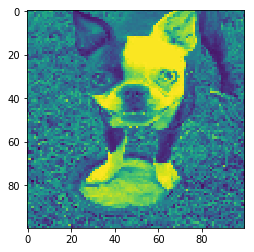















  0%|          | 39/10222 [00:03<16:34, 10.24it/s]

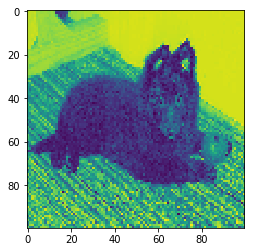

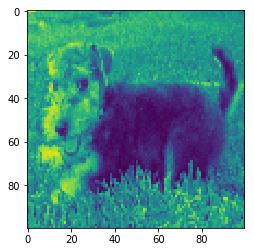















  0%|          | 41/10222 [00:03<16:31, 10.27it/s]

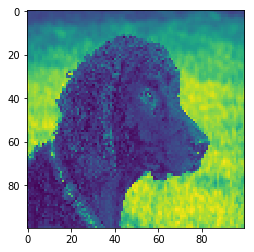

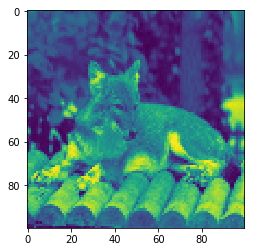















  0%|          | 43/10222 [00:04<16:27, 10.31it/s]

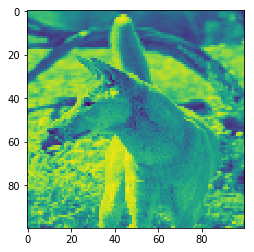

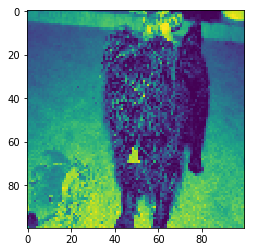















  0%|          | 45/10222 [00:04<16:28, 10.30it/s]

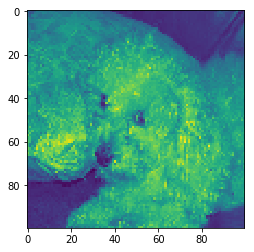

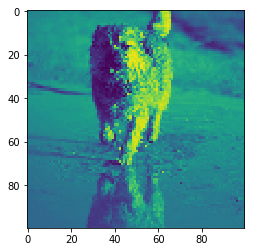















  0%|          | 47/10222 [00:04<16:24, 10.33it/s]

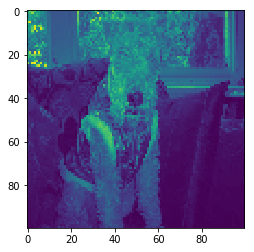

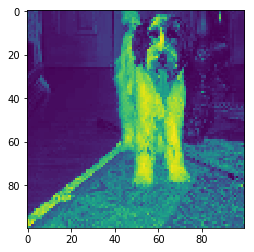















  0%|          | 49/10222 [00:04<16:25, 10.33it/s]

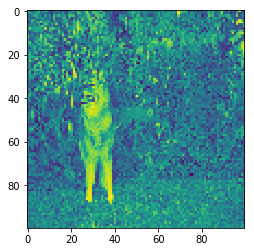

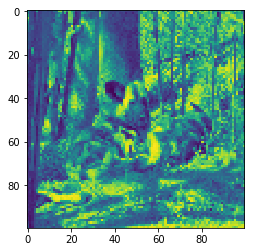















  0%|          | 51/10222 [00:04<16:24, 10.33it/s]

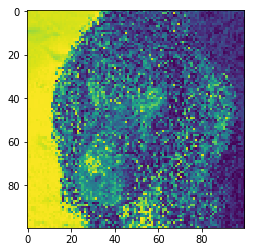

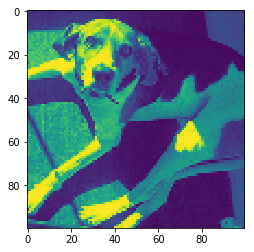















  1%|          | 53/10222 [00:05<16:32, 10.24it/s]

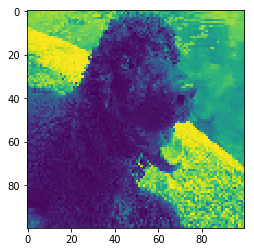

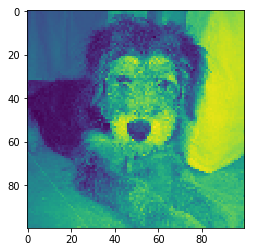















  1%|          | 55/10222 [00:05<16:31, 10.25it/s]

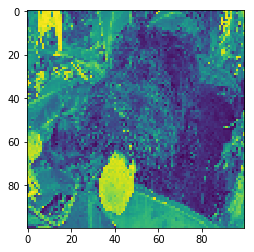

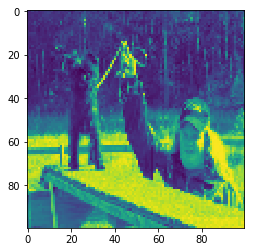















  1%|          | 57/10222 [00:05<16:35, 10.22it/s]

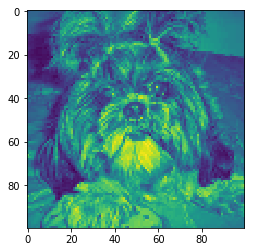















  1%|          | 58/10222 [00:05<16:37, 10.19it/s]

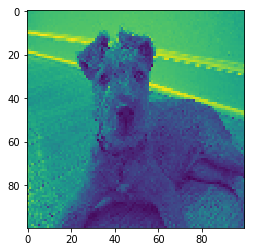

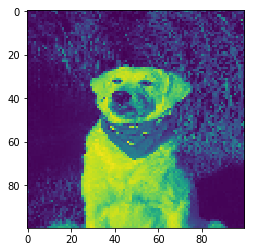















  1%|          | 60/10222 [00:05<16:38, 10.18it/s]

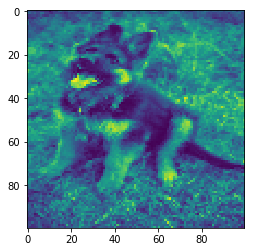

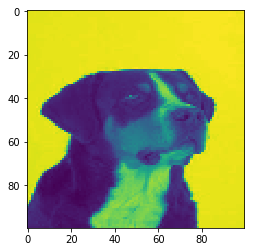















  1%|          | 62/10222 [00:06<16:34, 10.21it/s]

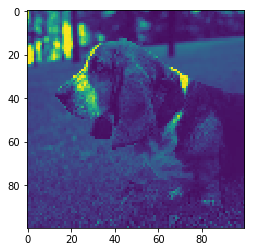

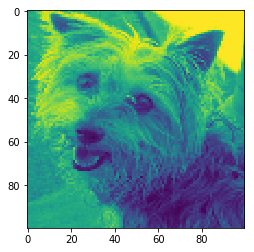















  1%|          | 64/10222 [00:06<16:33, 10.22it/s]

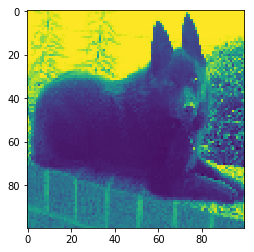

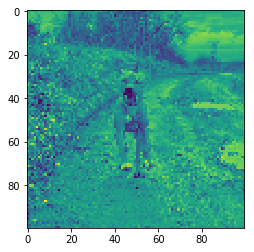















  1%|          | 66/10222 [00:06<16:36, 10.20it/s]

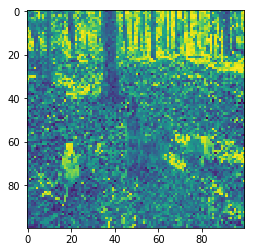

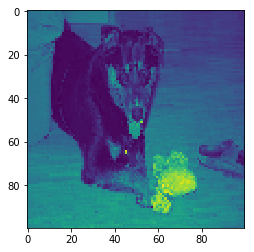















  1%|          | 68/10222 [00:06<16:36, 10.19it/s]

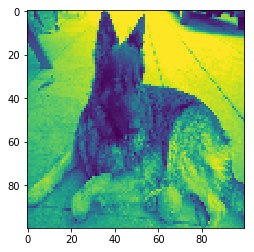

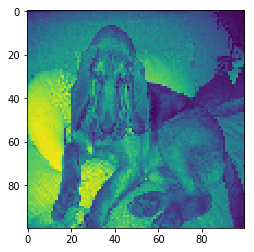















  1%|          | 70/10222 [00:06<16:35, 10.20it/s]

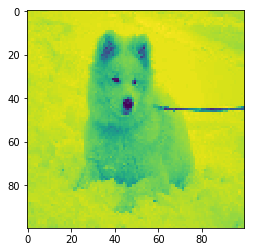

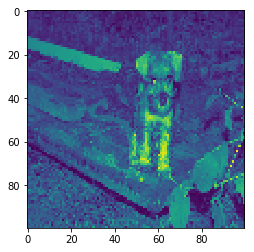















  1%|          | 72/10222 [00:07<16:35, 10.20it/s]

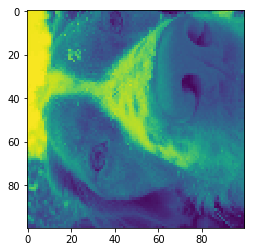

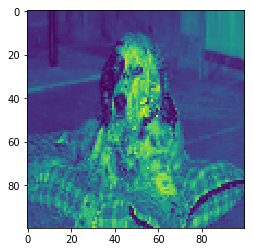















  1%|          | 74/10222 [00:07<16:33, 10.22it/s]

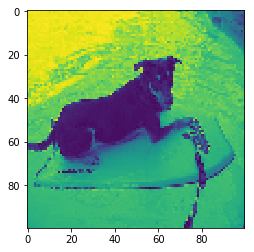

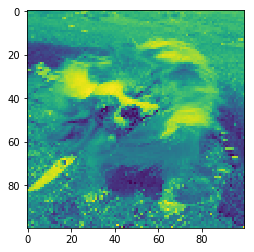















  1%|          | 76/10222 [00:07<16:33, 10.22it/s]

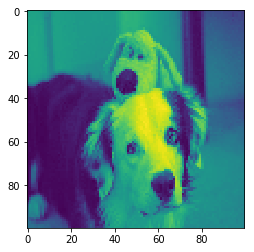

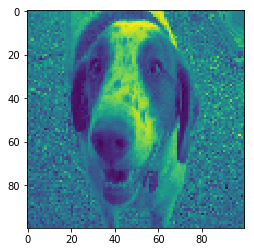















  1%|          | 78/10222 [00:07<16:30, 10.24it/s]

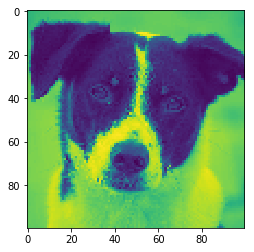

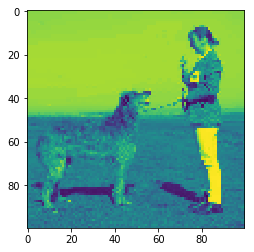















  1%|          | 80/10222 [00:07<16:28, 10.26it/s]

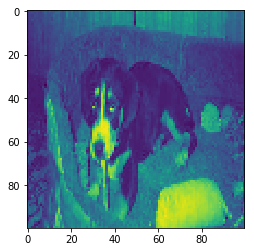

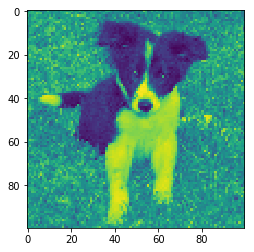















  1%|          | 82/10222 [00:07<16:27, 10.27it/s]

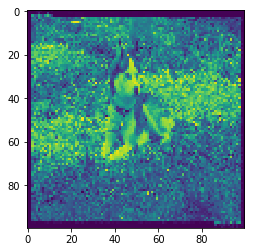

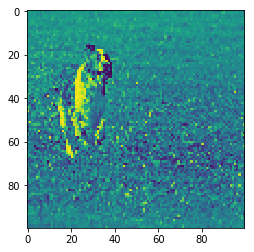















  1%|          | 84/10222 [00:08<16:26, 10.28it/s]

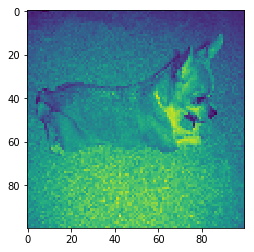

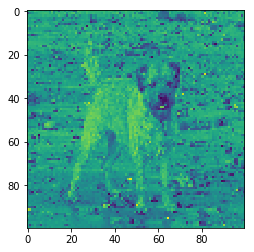















  1%|          | 86/10222 [00:08<16:25, 10.28it/s]

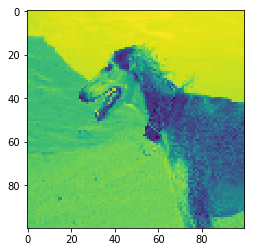

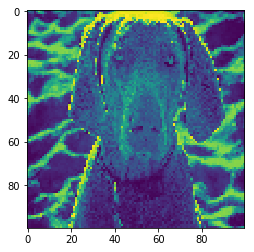















  1%|          | 88/10222 [00:08<16:23, 10.30it/s]

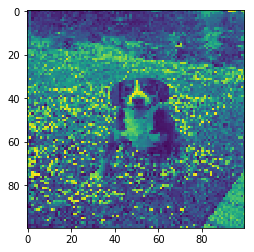

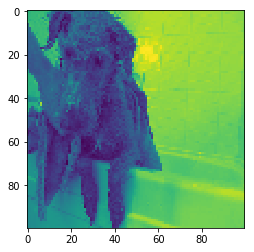















  1%|          | 90/10222 [00:08<16:21, 10.33it/s]

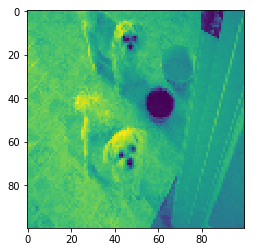

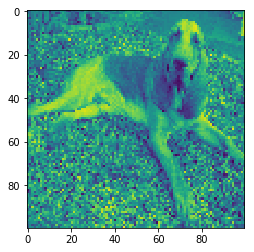















  1%|          | 92/10222 [00:08<16:21, 10.33it/s]

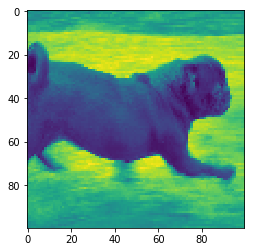

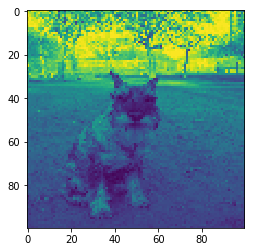















  1%|          | 94/10222 [00:09<16:23, 10.30it/s]

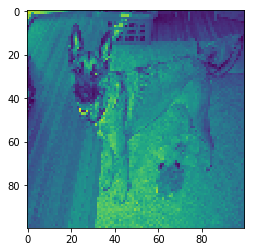

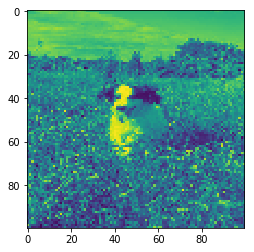















  1%|          | 96/10222 [00:09<16:25, 10.27it/s]

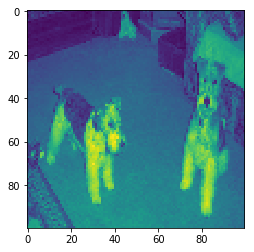

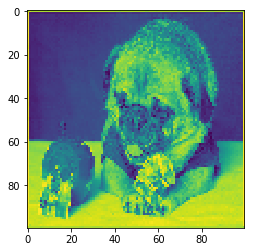















  1%|          | 98/10222 [00:09<16:24, 10.29it/s]

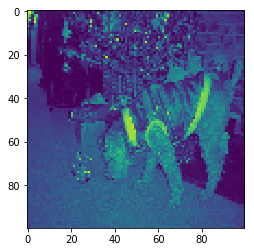

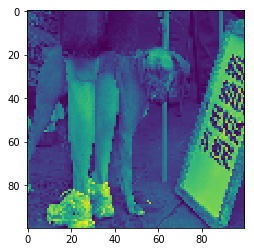















  1%|          | 100/10222 [00:09<16:23, 10.29it/s]

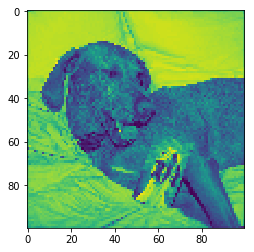

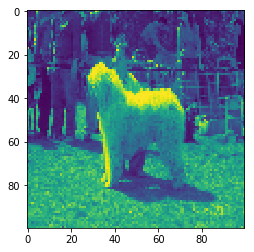

10222


In [184]:
path = "data/dog/train"

IMG_SIZE = 100



def create_training_data():
    i=0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#             plt.imshow(img_array)
#             plt.show()
            
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            plt.imshow(new_array)
            plt.show()

            
        except Exception as e: 
            pass
        if i>100:
            break
        i+=1




create_training_data()

print(len(training_data))

In [186]:
path = "data/dog/train"

training_data = []
IMG_SIZE = 100


def create_training_data():
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
            training_data.append([new_array, label_map[img[:-4]]])  
        except Exception as e: 
            pass




create_training_data()

print(len(training_data))

















  0%|          | 0/10222 [00:00<?, ?it/s]















  1%|          | 55/10222 [00:00<00:18, 540.43it/s]















  1%|          | 110/10222 [00:00<00:18, 541.76it/s]















  2%|▏         | 166/10222 [00:00<00:18, 546.40it/s]















  2%|▏         | 221/10222 [00:00<00:18, 547.59it/s]















  3%|▎         | 278/10222 [00:00<00:18, 550.12it/s]















  3%|▎         | 340/10222 [00:00<00:17, 560.95it/s]















  4%|▍         | 395/10222 [00:00<00:17, 559.16it/s]















  4%|▍         | 454/10222 [00:00<00:17, 562.13it/s]















  5%|▍         | 508/10222 [00:00<00:17, 553.09it/s]















  5%|▌         | 562/10222 [00:01<00:17, 551.10it/s]















  6%|▌         | 615/10222 [00:01<00:17, 548.48it/s]















  7%|▋         | 669/10222 [00:01<00:17, 547.89it/s]















  7%|▋         | 727/10222 [00:01<00:17, 550.11it/s]















  8%|▊         | 782/10222 [00:01<00:17, 549

 68%|██████▊   | 6941/10222 [00:12<00:05, 559.05it/s]















 69%|██████▊   | 7011/10222 [00:12<00:05, 560.09it/s]















 69%|██████▉   | 7072/10222 [00:12<00:05, 560.41it/s]















 70%|██████▉   | 7132/10222 [00:12<00:05, 560.15it/s]















 70%|███████   | 7191/10222 [00:12<00:05, 560.42it/s]















 71%|███████   | 7251/10222 [00:12<00:05, 560.67it/s]















 72%|███████▏  | 7310/10222 [00:13<00:05, 560.58it/s]















 72%|███████▏  | 7368/10222 [00:13<00:05, 560.35it/s]















 73%|███████▎  | 7425/10222 [00:13<00:04, 559.44it/s]















 73%|███████▎  | 7486/10222 [00:13<00:04, 559.79it/s]















 74%|███████▍  | 7542/10222 [00:13<00:04, 548.66it/s]















 74%|███████▍  | 7586/10222 [00:14<00:04, 538.87it/s]















 75%|███████▍  | 7621/10222 [00:14<00:04, 532.20it/s]















 75%|███████▍  | 7650/10222 [00:14<00:04, 525.62it/s]















 75%|███████▌  | 7674/10222 [00:14

 90%|█████████ | 9212/10222 [00:26<00:02, 346.08it/s]















 90%|█████████ | 9226/10222 [00:26<00:02, 345.27it/s]















 90%|█████████ | 9240/10222 [00:26<00:02, 344.41it/s]















 91%|█████████ | 9254/10222 [00:27<00:02, 342.65it/s]















 91%|█████████ | 9266/10222 [00:27<00:02, 341.78it/s]















 91%|█████████ | 9278/10222 [00:27<00:02, 340.71it/s]















 91%|█████████ | 9290/10222 [00:27<00:02, 339.64it/s]















 91%|█████████ | 9302/10222 [00:27<00:02, 338.84it/s]















 91%|█████████ | 9314/10222 [00:27<00:02, 338.01it/s]















 91%|█████████ | 9326/10222 [00:27<00:02, 336.93it/s]















 91%|█████████▏| 9339/10222 [00:27<00:02, 336.04it/s]















 91%|█████████▏| 9351/10222 [00:27<00:02, 334.36it/s]















 92%|█████████▏| 9364/10222 [00:28<00:02, 333.62it/s]















 92%|█████████▏| 9376/10222 [00:28<00:02, 332.73it/s]















 92%|█████████▏| 9390/10222 [00:28

10222


In [187]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

60
115
17
108
74
92
43
102
114
30


In [225]:
m ={}
for i in range(num_labels):
    m[i]=0
    
for features,label in training_data:
    m[label]+=1


[array([[117, 124, 122, ..., 115, 117, 105],
        [101, 103, 113, ..., 116, 116, 115],
        [ 99, 102, 108, ..., 133, 122, 126],
        ...,
        [ 70,  79,  74, ...,  88,  79,  90],
        [103,  56,  60, ...,  81,  72,  81],
        [ 94, 118,  97, ..., 100,  87, 100]], dtype=uint8), 60]

In [230]:
X = []
y = []


for features,label in training_data:
    if label in range(0,16):
        X.append(features)
        y.append(label)
        
print(set(y))
print(len(y))
y = to_categorical(y, num_classes = 16)
print(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
1372
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [231]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[228]
   [229]
   [230]
   ...
   [232]
   [230]
   [232]]

  [[229]
   [231]
   [232]
   ...
   [233]
   [232]
   [232]]

  [[230]
   [232]
   [231]
   ...
   [234]
   [233]
   [232]]

  ...

  [[226]
   [253]
   [254]
   ...
   [235]
   [237]
   [237]]

  [[193]
   [244]
   [254]
   ...
   [223]
   [228]
   [232]]

  [[168]
   [204]
   [249]
   ...
   [209]
   [214]
   [219]]]]


In [232]:
import pickle

pickle_out = open("data/dog/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("data/dog/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [233]:
pickle_in = open("data/dog/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("data/dog/y.pickle","rb")
y = pickle.load(pickle_in)

In [234]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("data/dog/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("data/dog/y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=1000, validation_split=0.1)

ValueError: Error when checking target: expected activation_62 to have shape (1,) but got array with shape (16,)

ValueError: Input 0 of layer conv2d_20 is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: [None, 1]